# This Program uses Convolution Neural Network(CNN) to classify hand written digits as numbers 0 - 9

In [1]:
# Import the Packages / Dependencies
import tensorflow as tf
from keras.models import Sequential 
from keras.layers import Dense, Conv2D, Flatten
from keras.utils import to_categorical
from keras.datasets import mnist # Get data set from
from matplotlib import pyplot as plt # Graph
import numpy as np

Using TensorFlow backend.


In [2]:
# load dataset
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
# summarize loaded dataset
print('Training_images: =%s,  labels=%s' % (training_images.shape, training_labels.shape))
print('Test_images:    =%s, labels=%s'  % (test_images.shape, test_labels.shape))


Training_images: =(60000, 28, 28),  labels=(60000,)
Test_images:    =(10000, 28, 28), labels=(10000,)


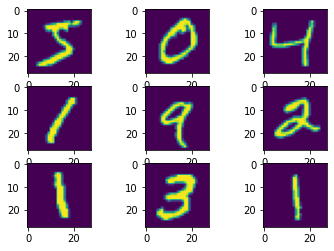

In [4]:
# plot first few images
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(training_images[i])
# show the figure
plt.show()

In [5]:
# Pixel in Image
print(training_images.shape)
print(training_images[0])

(60000, 28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 25

In [6]:
# Print the image label
training_labels[0]

5

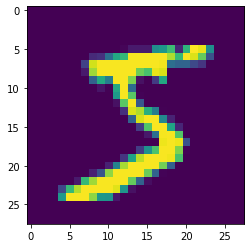

In [7]:
# Show the image as a picture
plt.imshow(training_images[0])

In [8]:
# Reshape the data to fit the model
training_images = training_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

In [9]:
# One -Hot Encoding:
training_labels_one_hot = to_categorical(training_labels)
test_images_one_hot = to_categorical(test_labels)

#print the new labels
print(training_labels_one_hot[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [10]:
#Build the CNN Model
model = Sequential()

#Add Model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [11]:
# Compile the Keras model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
# Train the Model
history = model.fit(training_images, training_labels_one_hot, validation_data=(test_images, test_images_one_hot), epochs=3, batch_size=512 )

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 727s 12ms/step - loss: 1.3762 - accuracy: 0.8701 - val_loss: 0.1054 - val_accuracy: 0.9682
Epoch 2/3
60000/60000 [==============================] - 604s 10ms/step - loss: 0.0848 - accuracy: 0.9744 - val_loss: 0.0798 - val_accuracy: 0.9758
Epoch 3/3
60000/60000 [==============================] - 610s 10ms/step - loss: 0.0524 - accuracy: 0.9839 - val_loss: 0.0749 - val_accuracy: 0.9789


In [13]:
# Evaluaction the Model on Testing data set
print(model.evaluate(test_images,test_images_one_hot))


10000/10000 [==============================] - 30s 3ms/step
[0.07491598255487625, 0.9789000153541565]


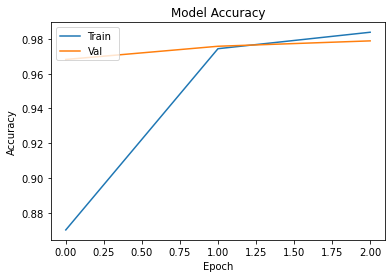

In [14]:
# Visualize the models accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train ', 'Val'], loc='upper left')
plt.show()


### Check Model Accuracy

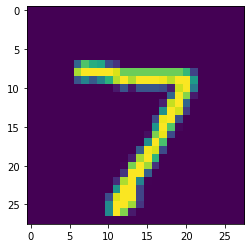

In [15]:
# Original Value
plt.imshow(test_images[0])

In [16]:
# Our Model prediction
prediction = model.predict(test_images)
print(np.argmax(prediction[0]))

7
